EXPLORATORY DATA ANALYSIS ON DATASET INDIAN PREMIER LEAGUE

AUTHOR: ASWANY SADANAND

DATA SCIENCE AND BUSINESS ANALYTICS INTERN

GRIPAPRIL24 @ THE SPARKS FOUNDATION

TASK 5 :EDA ON DATASET SPORTS(INDIAN PREMIER LEAGUE)

Problem Statement:
Find out the most successful teams, players and factors contributing win or loss of a team.
Suggest teams or players a company should endorse for its products


#importing the necessary libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#importing the dataset

In [65]:
df=pd.read_csv("Downloads/matches.csv")

In [66]:
df1=pd.read_csv("Downloads/deliveries.csv")

In [67]:
df.shape

(756, 18)

#data cleaning on dataset matches.csv

#checking null values

In [68]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#checking categorical and non categorical columns in df

In [69]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Print the lists of categorical and numerical columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: Index(['city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
Numerical columns: Index(['id', 'season', 'dl_applied', 'win_by_runs', 'win_by_wickets'], dtype='object')


In [70]:
##removing unwanted columns

In [71]:
cols_to_drop=["date","umpire3","dl_applied"]

In [72]:
df.drop(cols_to_drop,axis=1,inplace=True)

#data cleaning on dataset deliveries.csv represented as df1

In [73]:
#checking null values

In [13]:
df1.isnull().sum()

id                       0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

#checking categorical and non categorical columns in df1

In [74]:
# Separate categorical and numerical columns
categorical_columns = df1.select_dtypes(include=['object', 'category']).columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Print the lists of categorical and numerical columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: Index(['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')
Numerical columns: Index(['id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')


In [75]:
df1

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [76]:
df

,id,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


#merging two datsets df and df1 using left join

In [77]:
ipl = pd.merge(df, df1, on='id', how='left')

In [78]:
ipl

,id,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,Hyderabad,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2019,Hyderabad,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2019,Hyderabad,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2019,Hyderabad,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [79]:
ipl.shape

(179078, 35)

In [80]:
ipl.info

<bound method DataFrame.info of            id  season       city                team1  \
0           1    2017  Hyderabad  Sunrisers Hyderabad   
1           1    2017  Hyderabad  Sunrisers Hyderabad   
2           1    2017  Hyderabad  Sunrisers Hyderabad   
3           1    2017  Hyderabad  Sunrisers Hyderabad   
4           1    2017  Hyderabad  Sunrisers Hyderabad   
...       ...     ...        ...                  ...   
179073  11415    2019  Hyderabad       Mumbai Indians   
179074  11415    2019  Hyderabad       Mumbai Indians   
179075  11415    2019  Hyderabad       Mumbai Indians   
179076  11415    2019  Hyderabad       Mumbai Indians   
179077  11415    2019  Hyderabad       Mumbai Indians   

                              team2                  toss_winner  \
0       Royal Challengers Bangalore  Royal Challengers Bangalore   
1       Royal Challengers Bangalore  Royal Challengers Bangalore   
2       Royal Challengers Bangalore  Royal Challengers Bangalore   
3       Roy

In [81]:
 ipl.isnull().sum()

id                       0
season                   0
city                  1700
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
umpire2                500
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

#data analysis

#plotting number of matches played in each season

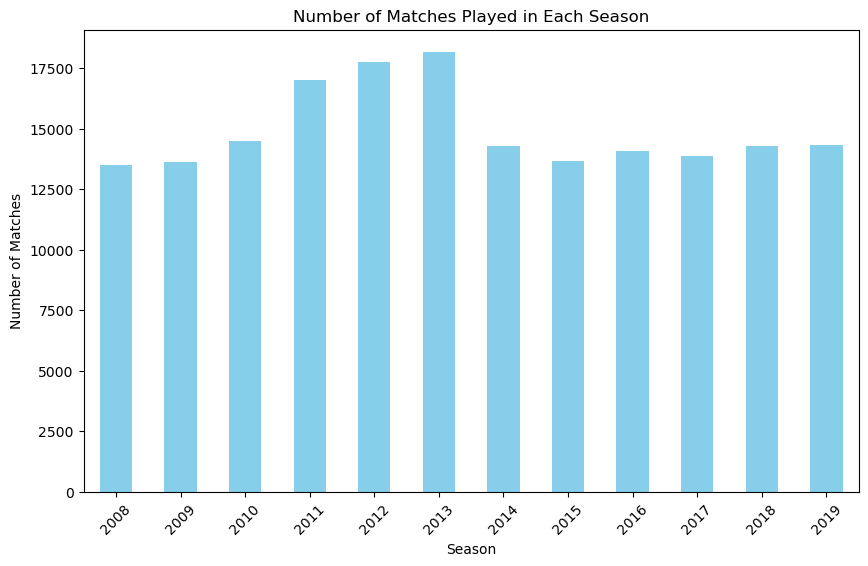

In [82]:
# Extract the season information
season_counts = ipl['season'].value_counts().sort_index()

# Plot the number of matches played in each season
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

#plotting number of teams played in each season

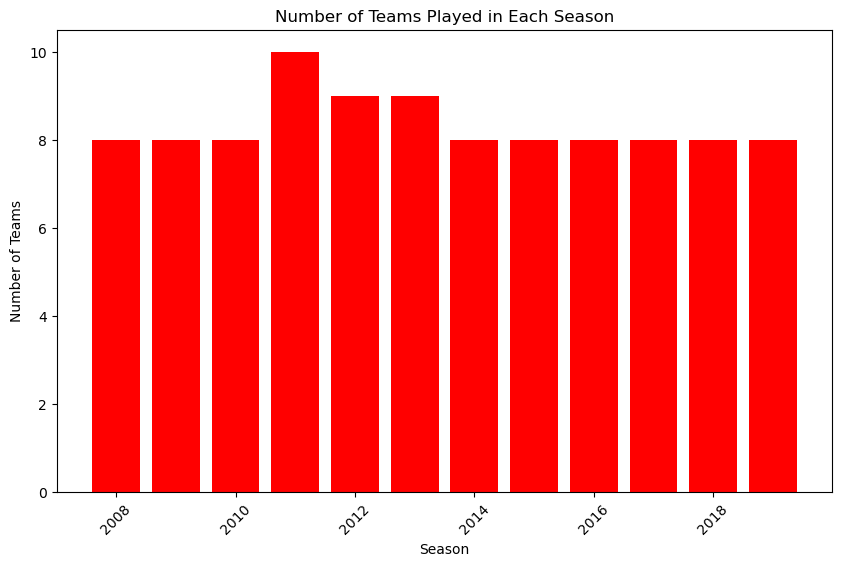

In [83]:
# Create a set to store unique teams
unique_teams = set()

# Iterate through each row of the dataset and add teams to the set
for _, row in ipl.iterrows():
    unique_teams.add(row['team1'])
    unique_teams.add(row['team2'])

# Create a dictionary to store the number of teams per season
teams_per_season = {}

# Iterate through each row of the dataset and count the number of teams per season
for season, season_data in ipl.groupby('season'):
    teams_per_season[season] = len(set(season_data['team1']) | set(season_data['team2']))

# Plot the number of teams played in each season
plt.figure(figsize=(10, 6))
plt.bar(teams_per_season.keys(), teams_per_season.values(), color='red')
plt.title('Number of Teams Played in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Teams')
plt.xticks(rotation=45)
plt.show()

#plotting the matches won by team

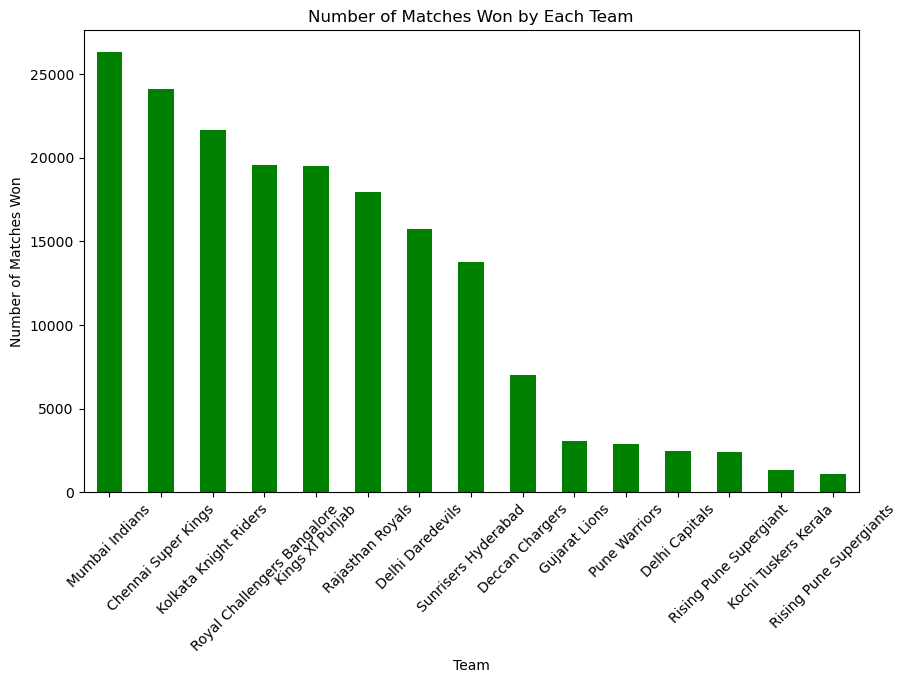

In [84]:
matches_won = ipl['winner'].value_counts()

# Plot the number of matches won by each team
plt.figure(figsize=(10, 6))
matches_won.plot(kind='bar', color='green')
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=45)
plt.show()

#plotting top 10 cities to conduct most number of matches

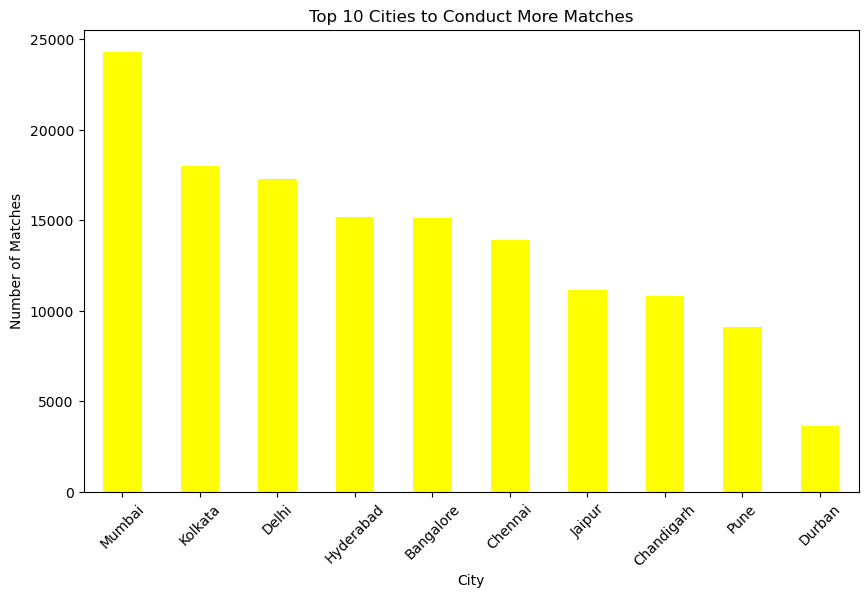

In [85]:
# Count the number of matches conducted in each city
matches_per_city = ipl['city'].value_counts()

# Select the top 10 cities
top_10_cities = matches_per_city.head(10)

# Plot the top 10 cities
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='yellow')
plt.title('Top 10 Cities to Conduct More Matches')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

#top 5 teams

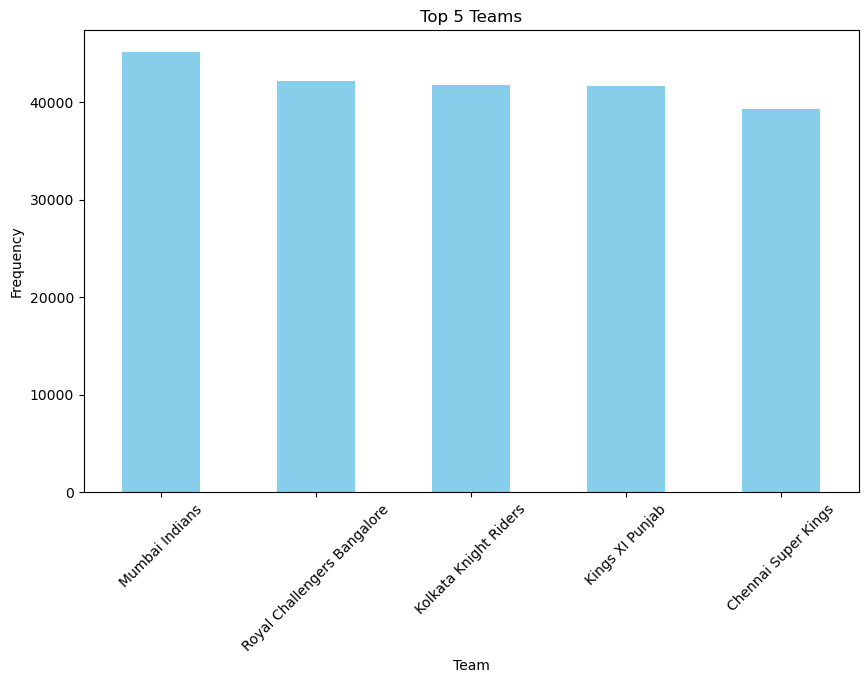

In [86]:
# Concatenate 'Team 1' and 'Team 2' columns to get all teams
all_teams = pd.concat([ipl['team1'], ipl['team2']])

# Count occurrences of each team
team_counts = all_teams.value_counts()

# Select top 5 teams
top_5_teams = team_counts.head(5)

# Plot the top 5 teams
plt.figure(figsize=(10, 6))
top_5_teams.plot(kind='bar', color='skyblue')
plt.title('Top 5 Teams')
plt.xlabel('Team')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


#top 5 batsman

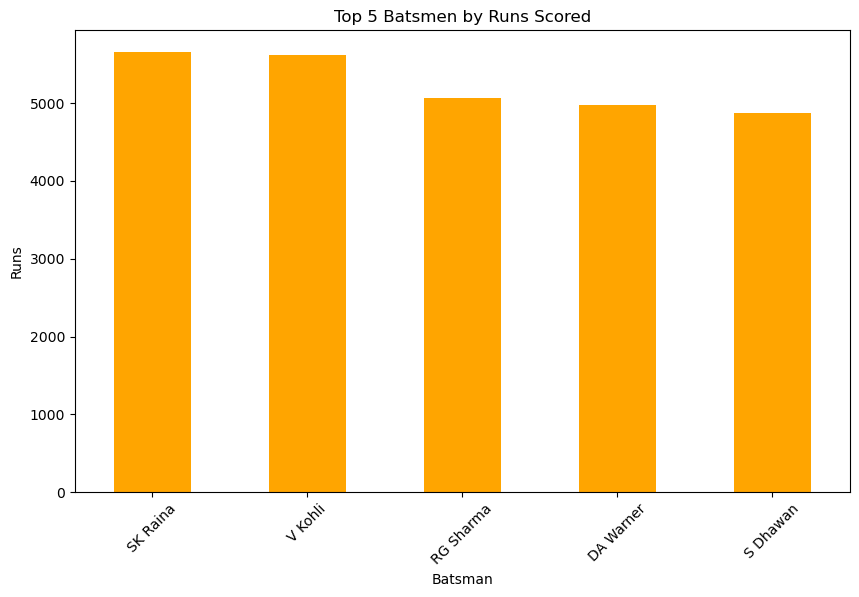

In [87]:
# Calculate runs scored by each batsman
runs_by_batsman = ipl.groupby('batsman')['total_runs'].sum()

# Sort batsmen based on runs scored
sorted_batsmen = runs_by_batsman.sort_values(ascending=False)

# Select top 5 batsmen
top_5_batsmen = sorted_batsmen.head(5)

# Plot the top 5 batsmen
plt.figure(figsize=(10, 6))
top_5_batsmen.plot(kind='bar', color='orange')
plt.title('Top 5 Batsmen by Runs Scored')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()

#top 5 bowlers

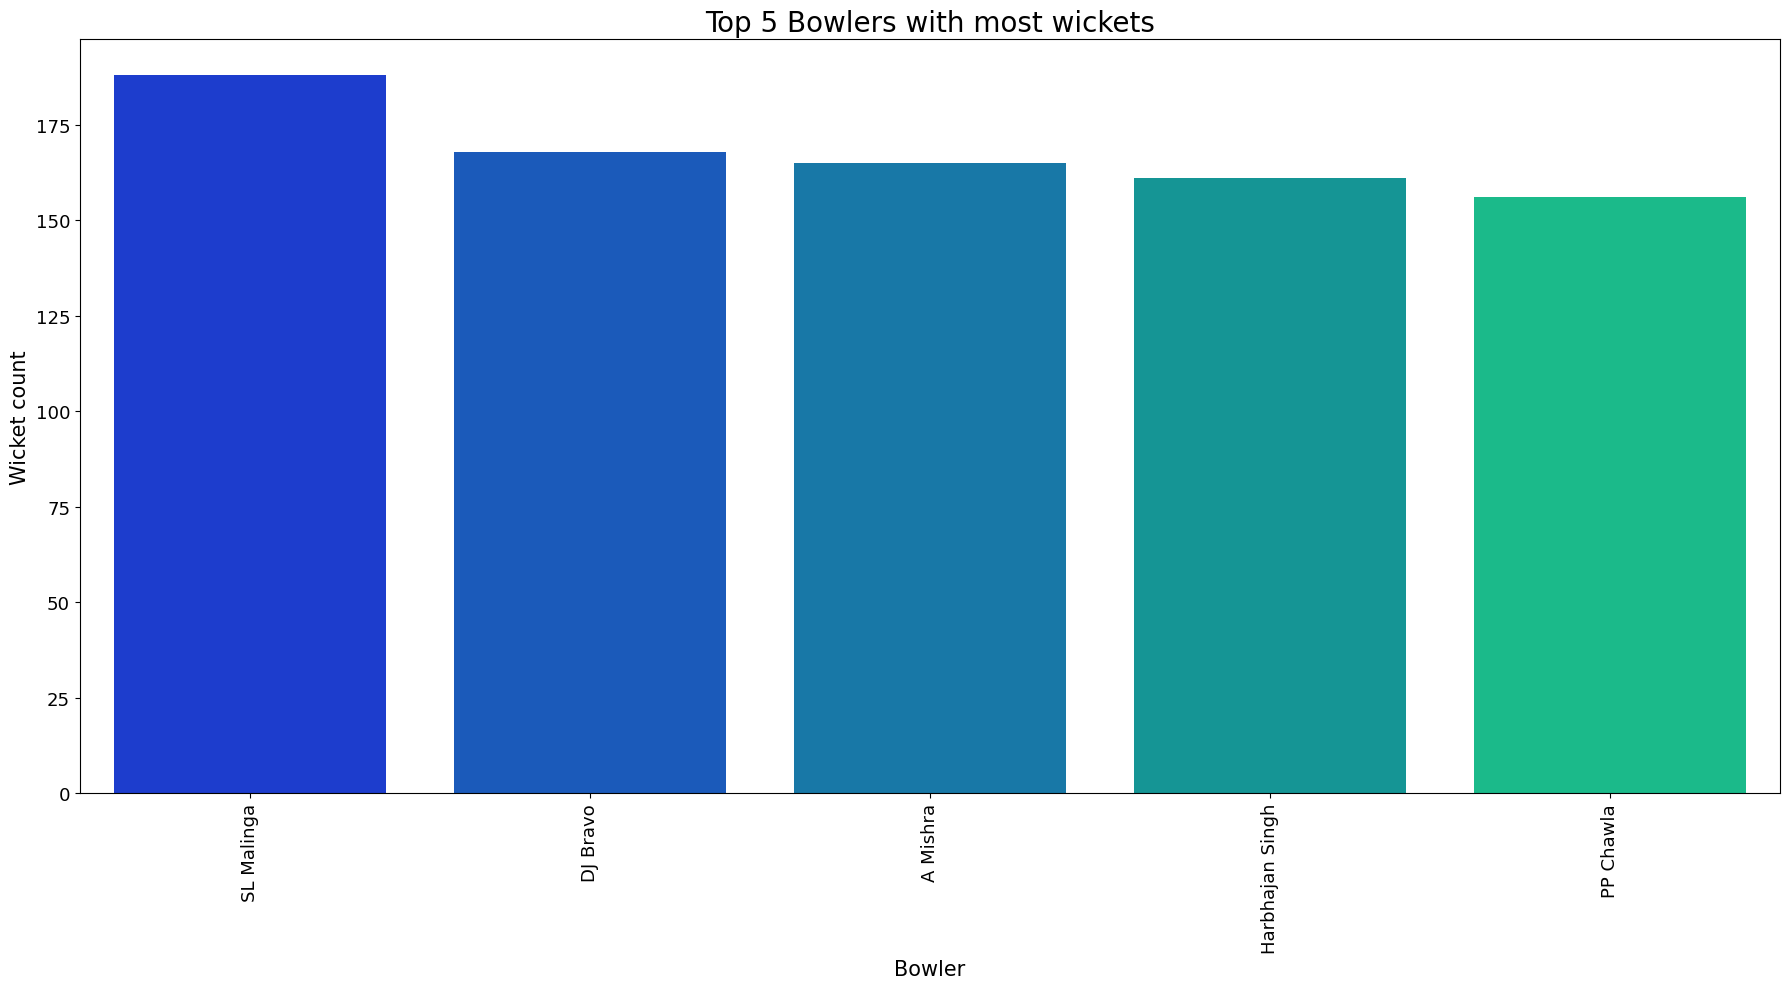

In [98]:
wicket_bowler=ipl.groupby('bowler')['dismissal_kind'].count().reset_index()
top_5_bowler=wicket_bowler.sort_values('dismissal_kind',ascending=False)[:5]
plt.figure(figsize=(18, 10))
sns.barplot(x='bowler',y='dismissal_kind',data=top_5_bowler,palette='winter')
plt.title('Top 5 Bowlers with most wickets',size=20)
plt.xlabel('Bowler',size=15)
plt.ylabel('Wicket count',size=15)
plt.xticks(rotation=90,size=13)
plt.yticks(size=13)
plt.tight_layout()
plt.show()

#plotting decisions after winning the toss

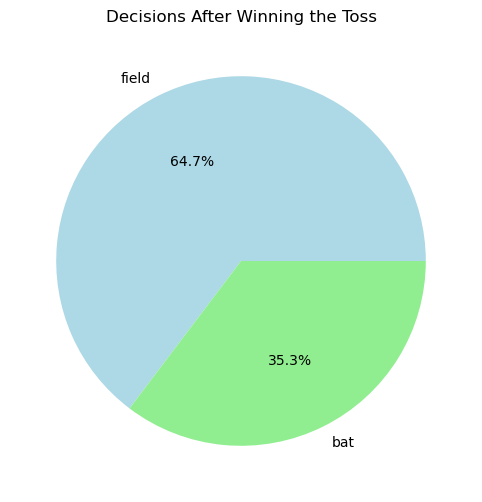

In [57]:
# Count the number of times each decision (batting or bowling) was made after winning the toss
toss_decisions = ipl[ipl['toss_winner'] == ipl['winner']]['toss_decision'].value_counts()

# Plot the decisions made after winning the toss as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Decisions After Winning the Toss')
plt.show()


#top 10 venues where most number of matches played

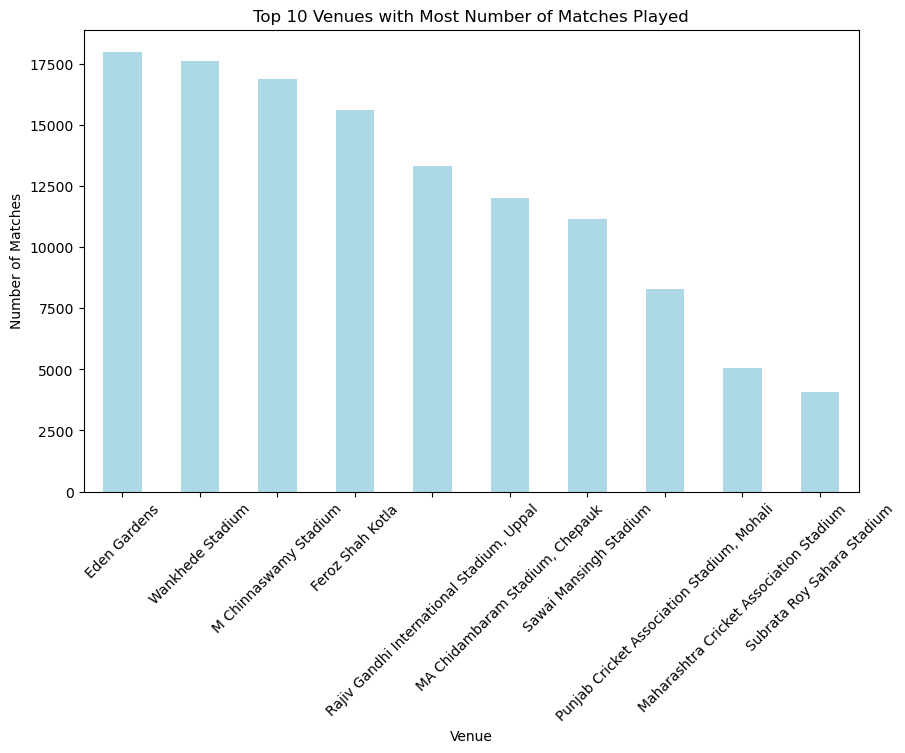

In [58]:
# Count the number of matches played at each venue
matches_per_venue = ipl['venue'].value_counts()

# Select the top 10 venues
top_10_venues = matches_per_venue.head(10)

# Plot the top 10 venues
plt.figure(figsize=(10, 6))
top_10_venues.plot(kind='bar', color='lightblue')
plt.title('Top 10 Venues with Most Number of Matches Played')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

#plotting player of the match

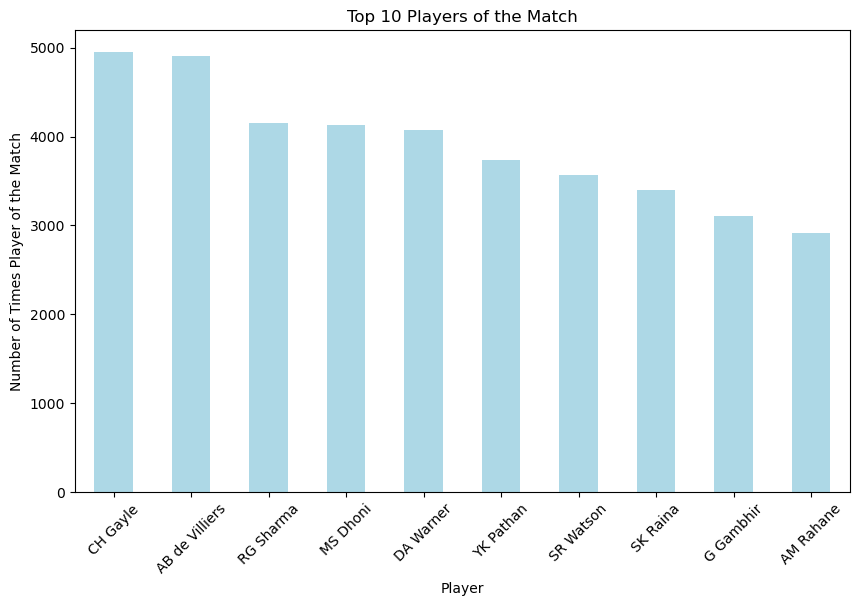

In [61]:
# Count the number of times each player has been awarded the "Player of the Match"
player_of_match_counts = ipl['player_of_match'].value_counts()

# Plot the "Player of the Match" counts
plt.figure(figsize=(10, 6))
player_of_match_counts.head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Players of the Match')
plt.xlabel('Player')
plt.ylabel('Number of Times Player of the Match')
plt.xticks(rotation=45)
plt.show()

#winners of each season

In [101]:
winners_by_season = ipl.groupby('season')['winner'].agg(lambda x: x.value_counts().index[0])
print("Winners of each season:")
print(winners_by_season)


Winners of each season:
season
2008         Rajasthan Royals
2009         Delhi Daredevils
2010           Mumbai Indians
2011      Chennai Super Kings
2012    Kolkata Knight Riders
2013           Mumbai Indians
2014          Kings XI Punjab
2015           Mumbai Indians
2016      Sunrisers Hyderabad
2017           Mumbai Indians
2018      Chennai Super Kings
2019           Mumbai Indians
Name: winner, dtype: object


CONCLUSION

1.Most number of matches are played in the season 2013
2.Most number of teams are played in season 2011
3.Mumbai Indians were the most successful team who won most number of matches in the IPL season followed by Chennai Superkings and Kolkatta Knight Riders.
4.Mumbai was the city where most of the matches were conducted followed by Kolkatta, Delhi and Hyderabad.
5.The top 5 teams of the IPL season were Mumbai Indians, Royal Challengers Banglore, Kolkatta Knight Riders, Kings XI punjab and Chennai Superkings.
5.The top 5 batsmaan of IPL season were S K Raina, V Kohli, R G Sharma, D  A Warner and S Dhawan.
6.The top 5 bowlers who won most wickets were S l Malinga, D J Bravo, A Misra, Harbhajan Singh and PP Chawla.
7.Most of the winning teams were who got the toss and had choosen to field first rather than batting.
8.Eden Garden and Wnkhade stadium are the venues were most number of matches were played.
9.The top players of the match were C H Gayle,AB de Williers and R G Sharma.

RECOMMENDATIONS

1.The top teams can be approached for promotion of the products were Mumbai Indians, Royal Challengers Banglore, Kolkatta 
Knight Riders, Kings XI punjab and Chennai Superkings.
2.The leading batsmen like S K Raina, V Kohli, R G Sharma, D  A Warner and S Dhawan can be approached for brand icon for top brands imagery.
3.The most talenting and most successful player of IPL season who has given outstanding performance through out the match Chris Ghayle can be approached for brand endorsements.
4.The top Venues where most of the matches were conducted, Eden gardens and Whankede Stadium can be approached for leverage the golden opportuity to gear up the promotion of brands.
5.Also the top city Mumbai where most number of matches had been played can be utilised to companies for their promotions.
